# Dense Sentiment Classifier

classifying IMDB reviews by sentiment.

#### Load dependencies 

In [2]:
import keras
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Embedding
from keras.callbacks import ModelCheckpoint
import os
from sklearn.metrics import roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Set Hyperparameter 

In [3]:
output_dir = './model_output/dense'

epochs = 4
batch_size = 128

n_dim = 64
n_unique_words = 5000
n_words_to_skip = 50
max_review_length = 100
pad_type = trunc_type = 'pre'

n_dense = 64
dropout = 0.5

#### Load data 

In [4]:
(x_train, y_train), (x_valid, y_valid) = imdb.load_data(num_words=n_unique_words, skip_top=n_words_to_skip)

In [5]:
x_train[0]

[2,
 2,
 2,
 2,
 2,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 2,
 173,
 2,
 256,
 2,
 2,
 100,
 2,
 838,
 112,
 50,
 670,
 2,
 2,
 2,
 480,
 284,
 2,
 150,
 2,
 172,
 112,
 167,
 2,
 336,
 385,
 2,
 2,
 172,
 4536,
 1111,
 2,
 546,
 2,
 2,
 447,
 2,
 192,
 50,
 2,
 2,
 147,
 2025,
 2,
 2,
 2,
 2,
 1920,
 4613,
 469,
 2,
 2,
 71,
 87,
 2,
 2,
 2,
 530,
 2,
 76,
 2,
 2,
 1247,
 2,
 2,
 2,
 515,
 2,
 2,
 2,
 626,
 2,
 2,
 2,
 62,
 386,
 2,
 2,
 316,
 2,
 106,
 2,
 2,
 2223,
 2,
 2,
 480,
 66,
 3785,
 2,
 2,
 130,
 2,
 2,
 2,
 619,
 2,
 2,
 124,
 51,
 2,
 135,
 2,
 2,
 1415,
 2,
 2,
 2,
 2,
 215,
 2,
 77,
 52,
 2,
 2,
 407,
 2,
 82,
 2,
 2,
 2,
 107,
 117,
 2,
 2,
 256,
 2,
 2,
 2,
 3766,
 2,
 723,
 2,
 71,
 2,
 530,
 476,
 2,
 400,
 317,
 2,
 2,
 2,
 2,
 1029,
 2,
 104,
 88,
 2,
 381,
 2,
 297,
 98,
 2,
 2071,
 56,
 2,
 141,
 2,
 194,
 2,
 2,
 2,
 226,
 2,
 2,
 134,
 476,
 2,
 480,
 2,
 144,
 2,
 2,
 2,
 51,
 2,
 2,
 224,
 92,
 2,
 104,
 2,
 226,
 65,
 2,
 2,
 1334,
 88,
 2

In [6]:
x_train[0:6]

array([list([2, 2, 2, 2, 2, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 2, 173, 2, 256, 2, 2, 100, 2, 838, 112, 50, 670, 2, 2, 2, 480, 284, 2, 150, 2, 172, 112, 167, 2, 336, 385, 2, 2, 172, 4536, 1111, 2, 546, 2, 2, 447, 2, 192, 50, 2, 2, 147, 2025, 2, 2, 2, 2, 1920, 4613, 469, 2, 2, 71, 87, 2, 2, 2, 530, 2, 76, 2, 2, 1247, 2, 2, 2, 515, 2, 2, 2, 626, 2, 2, 2, 62, 386, 2, 2, 316, 2, 106, 2, 2, 2223, 2, 2, 480, 66, 3785, 2, 2, 130, 2, 2, 2, 619, 2, 2, 124, 51, 2, 135, 2, 2, 1415, 2, 2, 2, 2, 215, 2, 77, 52, 2, 2, 407, 2, 82, 2, 2, 2, 107, 117, 2, 2, 256, 2, 2, 2, 3766, 2, 723, 2, 71, 2, 530, 476, 2, 400, 317, 2, 2, 2, 2, 1029, 2, 104, 88, 2, 381, 2, 297, 98, 2, 2071, 56, 2, 141, 2, 194, 2, 2, 2, 226, 2, 2, 134, 476, 2, 480, 2, 144, 2, 2, 2, 51, 2, 2, 224, 92, 2, 104, 2, 226, 65, 2, 2, 1334, 88, 2, 2, 283, 2, 2, 4472, 113, 103, 2, 2, 2, 2, 2, 178, 2]),
       list([2, 194, 1153, 194, 2, 78, 228, 2, 2, 1463, 4369, 2, 134, 2, 2, 715, 2, 118, 1634, 2, 394, 2, 2, 119, 954, 189, 102, 2, 20

In [7]:
for x in x_train[0:6]:
    print(len(x))

218
189
141
550
147
43


In [8]:
y_train[0:6]

array([1, 0, 0, 1, 0, 0], dtype=int64)

In [9]:
len(x_train), len(x_valid)

(25000, 25000)

#### Restore words from index

In [10]:
word_index = keras.datasets.imdb.get_word_index()
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["PAD"] = 0
word_index["START"] = 1
word_index["UNK"] = 2

In [11]:
word_index

{'wes': 3728,
 'failure': 2104,
 'neutrality': 25725,
 "tenant'": 68789,
 'mucho': 33152,
 'truman': 6550,
 'girlfight': 12877,
 'foreseeing': 43424,
 'pepperhaus': 61417,
 'negates': 23604,
 'katy': 28952,
 'delinquent': 20149,
 'jüri': 65960,
 'wtn': 65683,
 'kazetachi': 62697,
 'halsey': 41019,
 'marano': 59807,
 'osiris': 42329,
 "'pickpocket": 79269,
 'handshake': 36232,
 'grayscale': 84245,
 'neurotics': 42517,
 'musashi': 82079,
 'grandson': 10562,
 'callowness': 56289,
 'wounderfull': 83785,
 'koreas': 80069,
 'lumbering': 14320,
 "regiment's": 42939,
 'corncob': 50003,
 'newmar': 17864,
 'mices': 42258,
 "'macbeth'": 44692,
 'freebie': 34967,
 'drudge': 31873,
 'estrange': 71537,
 'shirl': 55963,
 'latchkey': 72556,
 "'council'": 54707,
 'crookedness': 84947,
 'unwraps': 55317,
 'blob': 3706,
 'jeopardized': 57564,
 'leit': 52561,
 'overs': 7363,
 'colombian': 19729,
 'horst': 32448,
 "'professor": 53885,
 'communist': 4237,
 'vague': 3482,
 'horrific': 2993,
 "sykes'": 32201,

In [12]:
index_word = {v:k for k,v in word_index.items()}

In [13]:
x_train[0]

[2,
 2,
 2,
 2,
 2,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 2,
 173,
 2,
 256,
 2,
 2,
 100,
 2,
 838,
 112,
 50,
 670,
 2,
 2,
 2,
 480,
 284,
 2,
 150,
 2,
 172,
 112,
 167,
 2,
 336,
 385,
 2,
 2,
 172,
 4536,
 1111,
 2,
 546,
 2,
 2,
 447,
 2,
 192,
 50,
 2,
 2,
 147,
 2025,
 2,
 2,
 2,
 2,
 1920,
 4613,
 469,
 2,
 2,
 71,
 87,
 2,
 2,
 2,
 530,
 2,
 76,
 2,
 2,
 1247,
 2,
 2,
 2,
 515,
 2,
 2,
 2,
 626,
 2,
 2,
 2,
 62,
 386,
 2,
 2,
 316,
 2,
 106,
 2,
 2,
 2223,
 2,
 2,
 480,
 66,
 3785,
 2,
 2,
 130,
 2,
 2,
 2,
 619,
 2,
 2,
 124,
 51,
 2,
 135,
 2,
 2,
 1415,
 2,
 2,
 2,
 2,
 215,
 2,
 77,
 52,
 2,
 2,
 407,
 2,
 82,
 2,
 2,
 2,
 107,
 117,
 2,
 2,
 256,
 2,
 2,
 2,
 3766,
 2,
 723,
 2,
 71,
 2,
 530,
 476,
 2,
 400,
 317,
 2,
 2,
 2,
 2,
 1029,
 2,
 104,
 88,
 2,
 381,
 2,
 297,
 98,
 2,
 2071,
 56,
 2,
 141,
 2,
 194,
 2,
 2,
 2,
 226,
 2,
 2,
 134,
 476,
 2,
 480,
 2,
 144,
 2,
 2,
 2,
 51,
 2,
 2,
 224,
 92,
 2,
 104,
 2,
 226,
 65,
 2,
 2,
 1334,
 88,
 2

In [14]:
' '.join(index_word[id] for id in x_train[0])

"UNK UNK UNK UNK UNK brilliant casting location scenery story direction everyone's really suited UNK part UNK played UNK UNK could UNK imagine being there robert UNK UNK UNK amazing actor UNK now UNK same being director UNK father came UNK UNK same scottish island UNK myself UNK UNK loved UNK fact there UNK UNK real connection UNK UNK UNK UNK witty remarks throughout UNK UNK were great UNK UNK UNK brilliant UNK much UNK UNK bought UNK UNK UNK soon UNK UNK UNK released UNK UNK UNK would recommend UNK UNK everyone UNK watch UNK UNK fly UNK UNK amazing really cried UNK UNK end UNK UNK UNK sad UNK UNK know what UNK say UNK UNK cry UNK UNK UNK UNK must UNK been good UNK UNK definitely UNK also UNK UNK UNK two little UNK UNK played UNK UNK UNK norman UNK paul UNK were UNK brilliant children UNK often left UNK UNK UNK UNK list UNK think because UNK stars UNK play them UNK grown up UNK such UNK big UNK UNK UNK whole UNK UNK these children UNK amazing UNK should UNK UNK UNK what UNK UNK done do

#### if we want to see all words 

In [15]:
(all_x_train, _), (all_x_valid, _) = imdb.load_data()

In [16]:
' '.join(index_word[id] for id in all_x_train[0])

"START this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and shou

#### Preprocess data 

In [17]:
x_train = pad_sequences(x_train, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)
x_valid = pad_sequences(x_valid, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)

In [18]:
x_train[0:6]

array([[1415,    2,    2,    2,    2,  215,    2,   77,   52,    2,    2,
         407,    2,   82,    2,    2,    2,  107,  117,    2,    2,  256,
           2,    2,    2, 3766,    2,  723,    2,   71,    2,  530,  476,
           2,  400,  317,    2,    2,    2,    2, 1029,    2,  104,   88,
           2,  381,    2,  297,   98,    2, 2071,   56,    2,  141,    2,
         194,    2,    2,    2,  226,    2,    2,  134,  476,    2,  480,
           2,  144,    2,    2,    2,   51,    2,    2,  224,   92,    2,
         104,    2,  226,   65,    2,    2, 1334,   88,    2,    2,  283,
           2,    2, 4472,  113,  103,    2,    2,    2,    2,    2,  178,
           2],
       [ 163,    2, 3215,    2,    2, 1153,    2,  194,  775,    2,    2,
           2,  349, 2637,  148,  605,    2,    2,    2,  123,  125,   68,
           2,    2,    2,  349,  165, 4362,   98,    2,    2,  228,    2,
           2,    2, 1157,    2,  299,  120,    2,  120,  174,    2,  220,
         175,  136,   5

In [19]:
for x in x_train[0:6]:
    print(len(x))

100
100
100
100
100
100


In [20]:
' '.join(index_word[id] for id in x_train[5])

'PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD UNK begins better than UNK ends funny UNK UNK russian UNK crew UNK UNK other actors UNK UNK those scenes where documentary shots UNK UNK spoiler part UNK message UNK UNK contrary UNK UNK whole story UNK UNK does UNK UNK UNK UNK'

#### Design NN Architecture

In [21]:
model = Sequential()
model.add(Embedding(n_unique_words, n_dim, input_length=max_review_length))
model.add(Flatten())
model.add(Dense(n_dense, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 64)           320000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                409664    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 729,729
Trainable params: 729,729
Non-trainable params: 0
_________________________________________________________________


In [23]:
n_dim, n_unique_words, n_dim*n_unique_words

(64, 5000, 320000)

In [24]:
max_review_length, n_dim, n_dim*max_review_length

(100, 64, 6400)

In [25]:
n_dense, n_dim*max_review_length*n_dense + n_dense

(64, 409664)

#### configure model 

In [26]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
modelcheckpoint = ModelCheckpoint(filepath=output_dir+"/weights.{epoch:02d}.hdf5")

In [28]:
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

#### Train! 

In [29]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_valid, y_valid), callbacks=[modelcheckpoint])

Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 9s 363us/step - loss: 0.5504 - acc: 0.6973 - val_loss: 0.3598 - val_acc: 0.8414
Epoch 2/4
25000/25000 [==============================] - 2s 97us/step - loss: 0.2790 - acc: 0.8877 - val_loss: 0.3489 - val_acc: 0.8445
Epoch 3/4
25000/25000 [==============================] - 2s 95us/step - loss: 0.1151 - acc: 0.9649 - val_loss: 0.4240 - val_acc: 0.8327
Epoch 4/4
25000/25000 [==============================] - 2s 97us/step - loss: 0.0239 - acc: 0.9964 - val_loss: 0.5248 - val_acc: 0.8334


#### Evaluate 

In [30]:
model.load_weights(output_dir+'/weights.01.hdf5')

In [31]:
y_hat = model.predict_proba(x_valid)

In [32]:
y_hat[0]

array([0.23632033], dtype=float32)

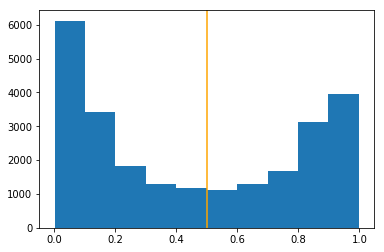

In [33]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')

In [34]:
pct_auc = roc_auc_score(y_valid, y_hat)*100.0

In [35]:
"{:0.2f}".format(pct_auc)

'92.66'

In [36]:
float_y_hat = []
for y in y_hat:
    float_y_hat.append(y[0])

In [38]:
ydf = pd.DataFrame(list(zip(float_y_hat,y_valid)), columns=['y_hat', 'y'])

In [40]:
ydf.head(10)

,y_hat,y
0,0.236320,0
1,0.888317,1
2,0.442056,1
3,0.269195,0
4,0.964825,1
5,0.764590,1
6,0.520336,1
7,0.042343,0
8,0.674793,0
9,0.358695,1


In [41]:
' '.join(index_word[id] for id in all_x_valid[0])

"START please give this one a miss br br kristy swanson and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite lacklustre so all you madison fans give this a miss"

In [43]:
' '.join(index_word[id] for id in all_x_valid[7])

"START the emperor's richard haydn dog is betrothed to johanna's joan fontaine dog however when virgil bing crosby arrives in town to sell a record player to the emperor his dog is attacked by johanna's dog after a revenge attack where virgil is banished from town a psychoanalyst insists that johanna's dog must confront dog so that she can overcome her doggy fears this is arranged and the dogs fall in love so do virgil and johanna the rest of the film passes by with romance and at the end johanna's dog gives birth but who is the father br br the dog story is the very weak vehicle that is used to try and create a story between humans its a terrible storyline there are 3 main musical pieces all of which are rubbish bad songs and dreadful choreography its just an extremely boring film bing has too many words in each sentence and delivers them in an almost irritating manner its not funny ever but its meant to be bing and joan have done much better than this"

#### Instances where neural net was wrong 
 (review was negative but prediction was positive)

In [45]:
ydf[(ydf.y == 0) & (ydf.y_hat > 0.9)].head(10)

,y_hat,y
386,0.933584,0
680,0.926047,0
693,0.902429,0
740,0.923064,0
781,0.909455,0
1059,0.959211,0
1207,0.951454,0
2151,0.947188,0
2216,0.952917,0
2397,0.970381,0


In [47]:
' '.join(index_word[id] for id in all_x_valid[2397])

'START this is definitely one of the best kung fu movies in the history of cinema the screenplay is really well done which is not often the case for this type of movies and you can see that chuck in one of his first role is a great actor the final fight with the sherif deputy in the is a masterpiece'

#### Instances where neural net was wrong 
(review was positive but prediction was negative)

In [50]:
ydf[(ydf.y == 1) & (ydf.y_hat < 0.1)].head(10)

,y_hat,y
224,0.058227,1
300,0.076052,1
325,0.089290,1
667,0.068273,1
973,0.065431,1
1192,0.087639,1
1229,0.099092,1
1361,0.087369,1
1893,0.094882,1
2027,0.035687,1


In [51]:
' '.join(index_word[id] for id in all_x_valid[2027])

"START although this episode was offensive to the syndrome association others thought it was funny while others thought it was a bad way to start the new season br br this episode was funny and just shocking south park has made history as being their first episode with the most cuss words unless you count the movie as an episode br br i enjoyed how they made fun of chris hansen and his television show to catch a predator i didn't like the idea on how they thought chris hansen would do a show on and let a boy speak out and bash the jews br br one thing i did not like is how south park thought that people with syndrome would just blurt out bad language like that i've seen people on television with syndrome and they do not just blurt out bad words unless i am incorrect"